In [1]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt

<class 'geopandas.geodataframe.GeoDataFrame'>


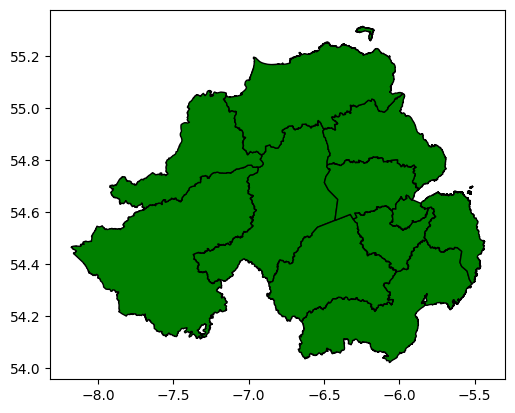

In [6]:
districts = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Shapefiles\Shapefiles\districts.shp')

districts.plot(color = 'green', edgecolor = 'black')

<AxesSubplot:>

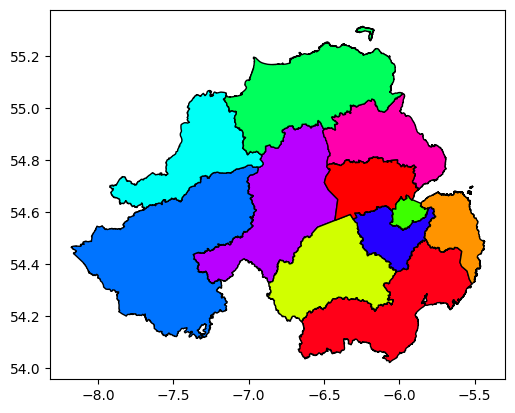

In [5]:
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')

In [14]:
atms = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Shapefiles\Shapefiles\atms.shp')
area_of_interest = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Shapefiles\Shapefiles\area_of_interest.shp')

<AxesSubplot:>

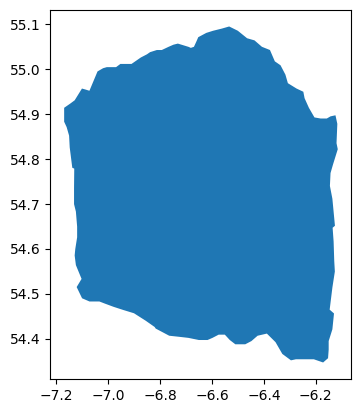

In [7]:
area_of_interest.plot()

<AxesSubplot:>

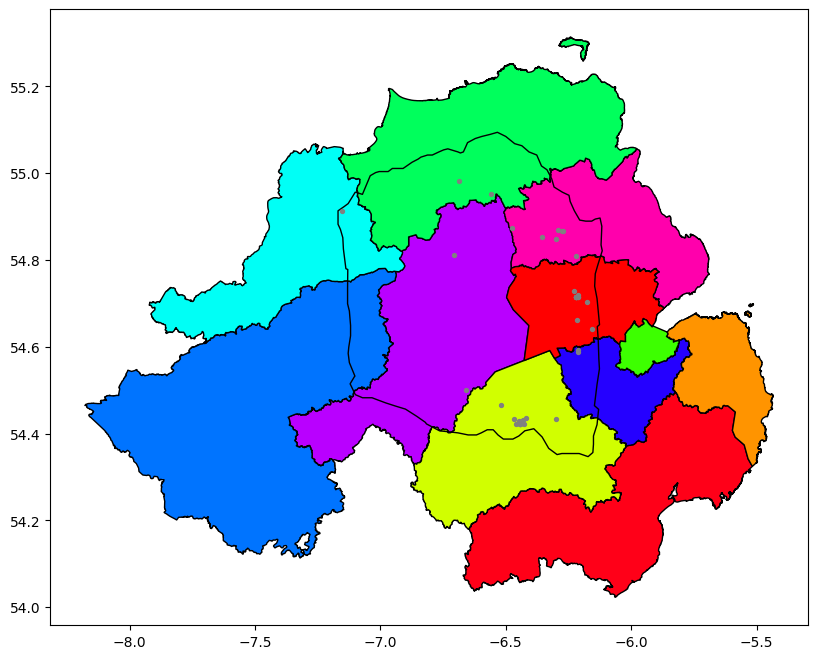

In [18]:
fig, ax = plt.subplots(figsize = (10, 8))
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')
atms.plot(ax = ax, markersize = 8, color = 'grey')

<AxesSubplot:>

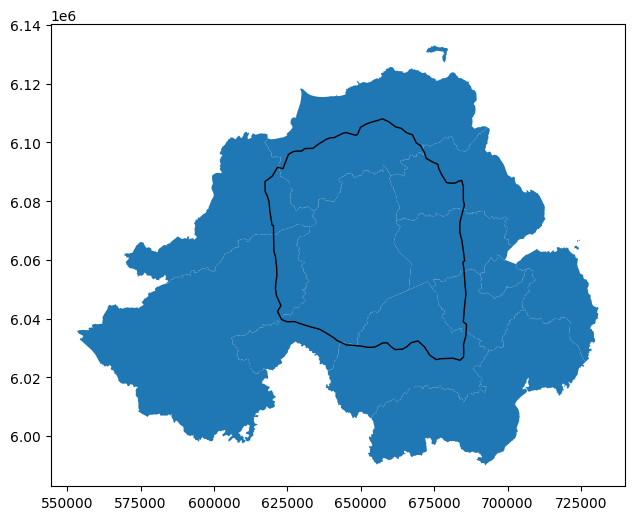

In [24]:
fig, ax = plt.subplots(figsize = (8, 6))
districts = districts.to_crs(epsg = 32629)
districts.plot(ax = ax)
area_of_interest = area_of_interest.to_crs(epsg = 32629)
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')

<AxesSubplot:>

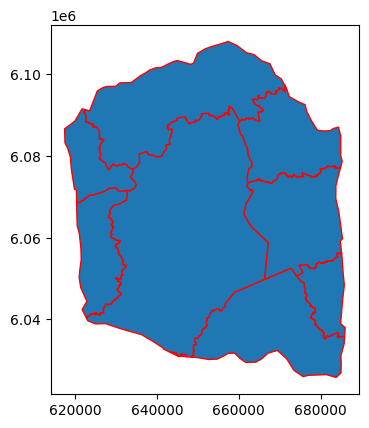

In [27]:
districts_in_aoi = gpd.overlay(districts, area_of_interest, how = 'intersection')
districts_in_aoi.plot(edgecolor = 'red')

In [2]:
# import plotly.express as px

# df = px.data.gapminder().query("year==2007")
# fig = px.choropleth(df, locations="iso_alpha",
#                     color="pop", # lifeExp is a column of gapminder
#                     hover_name="country", # column to add to hover information
#                     color_continuous_scale=px.colors.sequential.Plasma,
#                     range_color=(df['pop'].min(), df['pop'].max()))
# fig.show()

In [18]:
import plotly.express as px

df = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_shapefile\ie_10km.shp')

#ireland.plot(cmap = 'hsv', edgecolor = 'black', column = 'geometry')

fig = px.choropleth(
    df,
    geojson=df['geometry'],
    locations=df['CELLCODE'],
    featureidkey="properties.CELLCODE",
    color_discrete_map={'economic_area': 'blue', 'terrestrial': 'green'},
    projection="mercator",
    title="Economic Area vs. Terrestrial Territory in Ireland",
    hover_name="CELLCODE",
    labels={'color': 'Area Type'},
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [7]:
print(ireland)

          CELLCODE  EOFORIGIN  NOFORIGIN  \
0     10kmE254N330    2540000    3300000   
1     10kmE254N331    2540000    3310000   
2     10kmE254N332    2540000    3320000   
3     10kmE254N333    2540000    3330000   
4     10kmE254N334    2540000    3340000   
...            ...        ...        ...   
5418  10kmE333N348    3330000    3480000   
5419  10kmE333N349    3330000    3490000   
5420  10kmE333N350    3330000    3500000   
5421  10kmE333N351    3330000    3510000   
5422  10kmE333N352    3330000    3520000   

                                               geometry  
0     POLYGON ((2540000.000 3300000.000, 2540000.000...  
1     POLYGON ((2540000.000 3310000.000, 2540000.000...  
2     POLYGON ((2540000.000 3320000.000, 2540000.000...  
3     POLYGON ((2540000.000 3330000.000, 2540000.000...  
4     POLYGON ((2540000.000 3340000.000, 2540000.000...  
...                                                 ...  
5418  POLYGON ((3330000.000 3480000.000, 3330000.000...  
5419  P

<AxesSubplot:>

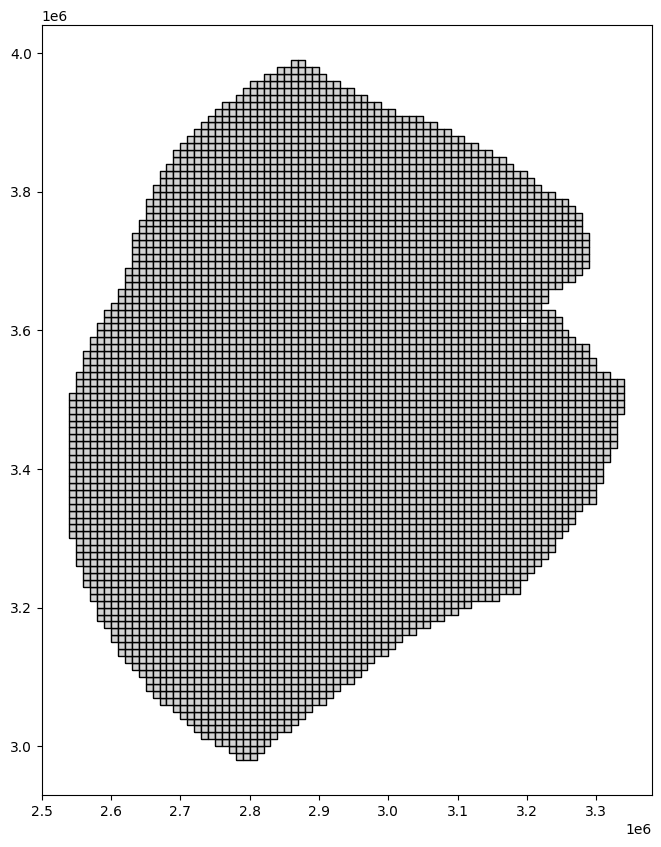

<AxesSubplot:>

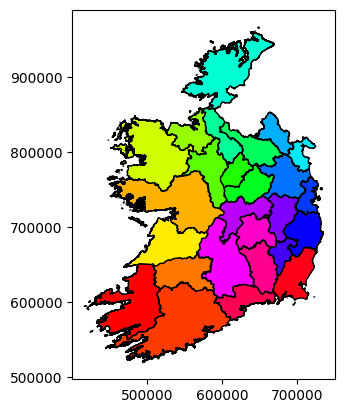

In [20]:
import plotly.express as px

df = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')

df.plot(cmap = 'hsv', edgecolor = 'black', column = 'geometry')

In [21]:
print(df)

    OBJECTID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000    DONEGAL       Dún na nGall     100013   
1          2  120000   LIMERICK          Luimneach     100022   
2          3   80000    KILDARE          Cill Dara     100007   
3          4  220000  WATERFORD        Port Láirge     100026   
4          5  260000     DUBLIN  Baile Átha Cliath     100002   
5          6  230000  WESTMEATH          An Iarmhí     100016   
6          7  170000   MONAGHAN         Muineachán     100025   
7          8  250000    WICKLOW      Cill Mhantáin     100008   
8          9   40000       CORK           Corcaigh     100010   
9         10   70000      KERRY            Ciarraí     100005   
10        11  190000  ROSCOMMON         Ros Comáin     100027   
11        12  240000    WEXFORD        Loch Garman     100019   
12        13  130000   LONGFORD        An Longfort     100020   
13        14  160000      MEATH             An Mhí     100024   
14        15   20000     

EPSG:2157


<AxesSubplot:>

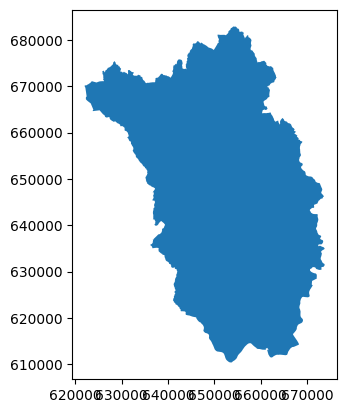

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
df = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')
# Assuming your DataFrame is named df
gdf = gpd.GeoDataFrame(df)
print(df.crs)
kk = df[df.COUNTY == 'KILKENNY']
kk.plot()

<AxesSubplot:>

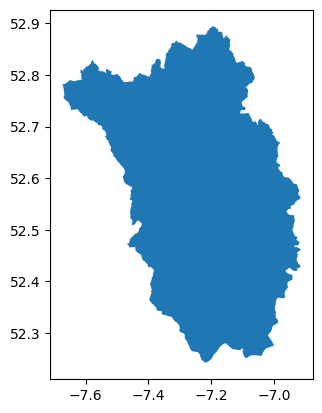

In [12]:
kk_4326 = kk.to_crs(epsg = 4326) #plotted map will be scaled using actual latlong coords
kk_4326.to_file('kk_4326.shp', driver = 'ESRI Shapefile')

kkdf = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\kk_4326.shp')
kkdf.plot()

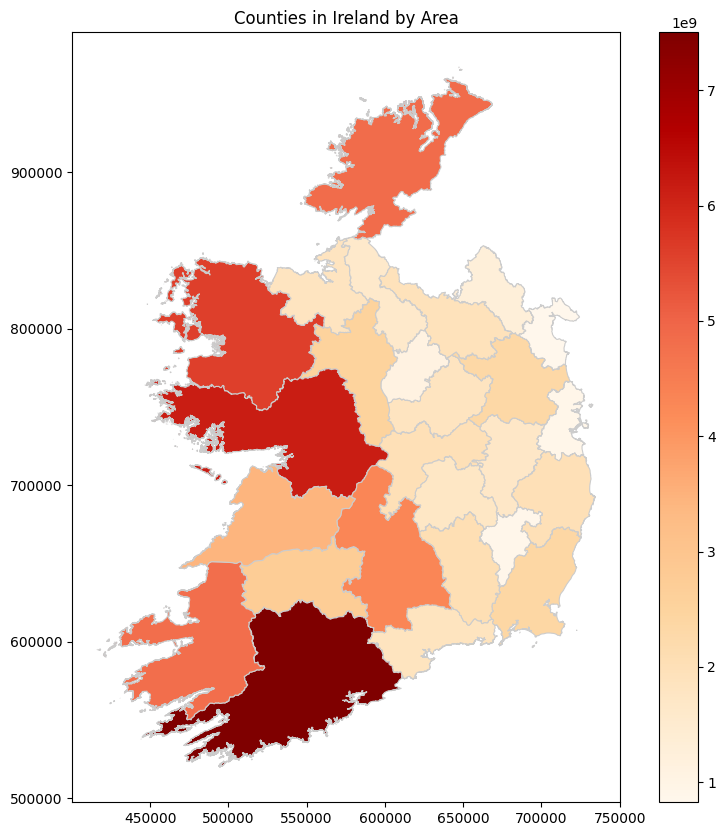

In [10]:
#Plotting the choropleth map based on AREA
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(column='AREA', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Counties in Ireland by Area')
plt.show()

In [9]:
kk_4326 = kk.to_crs(epsg = 4326)
kk_4326.to_file('kk_4326.shp', driver = 'ESRI Shapefile')

In [21]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\historical.csv')
df['County'] = df['County'].str.upper()
print(df)

     STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
0     FY001C01  Population at Each Census       1841        1841            -   
1     FY001C01  Population at Each Census       1841        1841            -   
2     FY001C01  Population at Each Census       1841        1841            -   
3     FY001C01  Population at Each Census       1841        1841           01   
4     FY001C01  Population at Each Census       1841        1841           01   
...        ...                        ...        ...         ...          ...   
2101  FY001C01  Population at Each Census       2022        2022           25   
2102  FY001C01  Population at Each Census       2022        2022           25   
2103  FY001C01  Population at Each Census       2022        2022           26   
2104  FY001C01  Population at Each Census       2022        2022           26   
2105  FY001C01  Population at Each Census       2022        2022           26   

        County C02199V02655

In [16]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')
print(counties_shapefile)

    OBJECTID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000    DONEGAL       Dún na nGall     100013   
1          2  120000   LIMERICK          Luimneach     100022   
2          3   80000    KILDARE          Cill Dara     100007   
3          4  220000  WATERFORD        Port Láirge     100026   
4          5  260000     DUBLIN  Baile Átha Cliath     100002   
5          6  230000  WESTMEATH          An Iarmhí     100016   
6          7  170000   MONAGHAN         Muineachán     100025   
7          8  250000    WICKLOW      Cill Mhantáin     100008   
8          9   40000       CORK           Corcaigh     100010   
9         10   70000      KERRY            Ciarraí     100005   
10        11  190000  ROSCOMMON         Ros Comáin     100027   
11        12  240000    WEXFORD        Loch Garman     100019   
12        13  130000   LONGFORD        An Longfort     100020   
13        14  160000      MEATH             An Mhí     100024   
14        15   20000     

In [39]:
merged_data = counties_shapefile.merge(df, how='left', left_on='ENGLISH', right_on='County')
year = 2006
merged_data = merged_data[merged_data['CensusYear'] == year]
print(merged_data)

      OBJECTID   CO_ID    ENGLISH         GAEILGE LOGAINM_ID  \
66           1   50000    DONEGAL    Dún na nGall     100013   
67           1   50000    DONEGAL    Dún na nGall     100013   
68           1   50000    DONEGAL    Dún na nGall     100013   
144          2  120000   LIMERICK       Luimneach     100022   
145          2  120000   LIMERICK       Luimneach     100022   
...        ...     ...        ...             ...        ...   
1939        25  210000  TIPPERARY  Tiobraid Árann     100029   
1940        25  210000  TIPPERARY  Tiobraid Árann     100029   
2016        26   30000      CLARE         An Clár     100009   
2017        26   30000      CLARE         An Clár     100009   
2018        26   30000      CLARE         An Clár     100009   

                                      GUID          CONTAE     COUNTY  \
66    2ae19629-1452-13a3-e055-000000000001    Dún na nGall    DONEGAL   
67    2ae19629-1452-13a3-e055-000000000001    Dún na nGall    DONEGAL   
68    2ae196

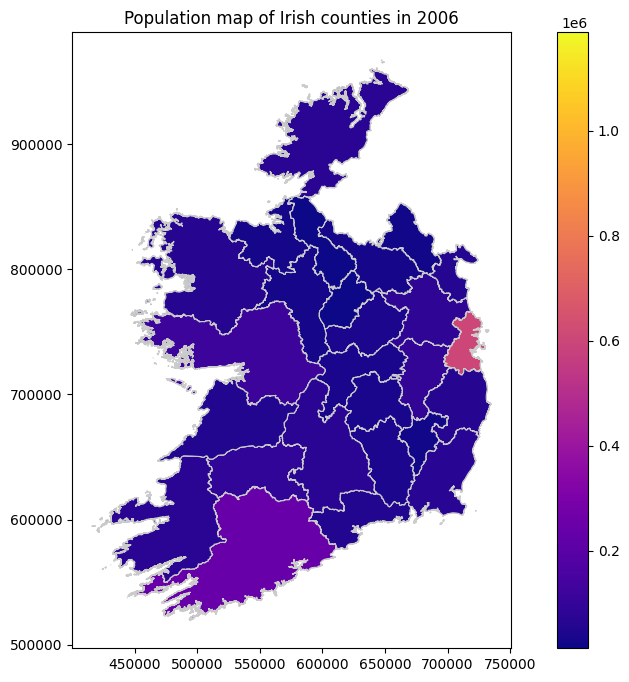

In [40]:
import matplotlib.pyplot as plt

# Replace 'column_to_plot' with the actual column name you want to visualize
column_to_plot = 'VALUE'

# year = 1841

# selected_year = merged_data[merged_data['CensusYear'] == year]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column=column_to_plot, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
title_string = "Population map of Irish counties in " + str(year)
ax.set_title(title_string)
plt.show()